# Student Grade Prediction - Improved Version

In [6]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import sys

In [7]:
# Ignore feature name warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## Step 1: Generate Realistic Dataset (20 samples with noise)

In [8]:
np.random.seed(42)
hours = np.random.uniform(1, 10, 20)
marks = 10 * hours + np.random.normal(0, 5, 20)

In [9]:
df = pd.DataFrame({'Hours': hours, 'Marks': marks})
df.to_csv('student_scores.csv', index=False)
print("Dataset created and saved as student_scores.csv")
df.sample(15)

Dataset created and saved as student_scores.csv


,Hours,Marks
4,2.404168,31.369921
2,7.587945,71.339334
10,1.185260,6.097637
0,4.370861,38.644455
8,6.410035,61.378437
7,8.795585,80.832112
6,1.522753,15.565166
15,2.650641,35.767797
16,3.738180,37.314316
14,2.636425,23.355714


## Step 2: Prepare Data

In [10]:
X = df[['Hours']]  
y = df['Marks'] 

In [11]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 3: Train Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


## # Step 4: Model Evaluation 

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y, model.predict(X))

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Model R² Score: {r2:.2f}")

Train MSE: 14.97
Test MSE: 37.91
Model R² Score: 0.97


## Step 5: Take User Input with Error Handling

In [14]:
try:
    hours_input = float(input("Enter study hours: "))
except ValueError:
    print("❌ Please enter a valid numeric value for hours!")
    sys.exit()

predicted_marks = model.predict(pd.DataFrame({'Hours': [hours_input]}))
print(f"Predicted Marks: {predicted_marks[0]:.2f}")

Enter study hours:  9


Predicted Marks: 87.27


## Step 6: Plot Regression Graph

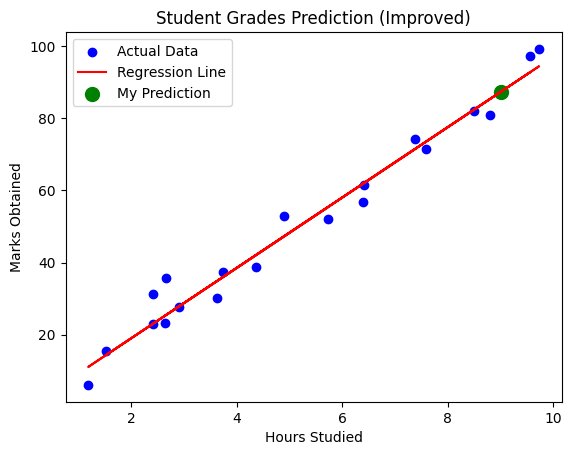

In [15]:
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.scatter(hours_input, predicted_marks, color='green', s=100, label="My Prediction")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.title("Student Grades Prediction (Improved)")
plt.legend()
plt.show()